<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

----

This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [**here**](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

In [5]:
# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [7]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [9]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the Date column to a datetime type**

Use **pd.to_datetime** to convert the Date column to a datetime.

**WARNING**: The date column is formatted as day-month-year. Does **pd.to_datetime** work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check the [**documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for **pd.to_datetime**, and see if one of the settings fixes things.

In [13]:
# Convert the 'Date' column to datetime with dayfirst=True
pox['date'] = pd.to_datetime(pox['date'], dayfirst=True)
pox.head() # Check work

,date,budapest_cases
0,2005-01-03,168
1,2005-01-10,157
2,2005-01-17,96
3,2005-01-24,163
4,2005-01-31,122


**Set the **Date** column to be the index**

In [15]:
pox.set_index('date', inplace=True)

In [23]:
pox.sort_index(inplace=True)

In [25]:
pox.head() # check

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [ ]:
# earliest = 2005-01-03	
# latest = 2005-01-31

**Plot a histogram of the Budapest cases column**

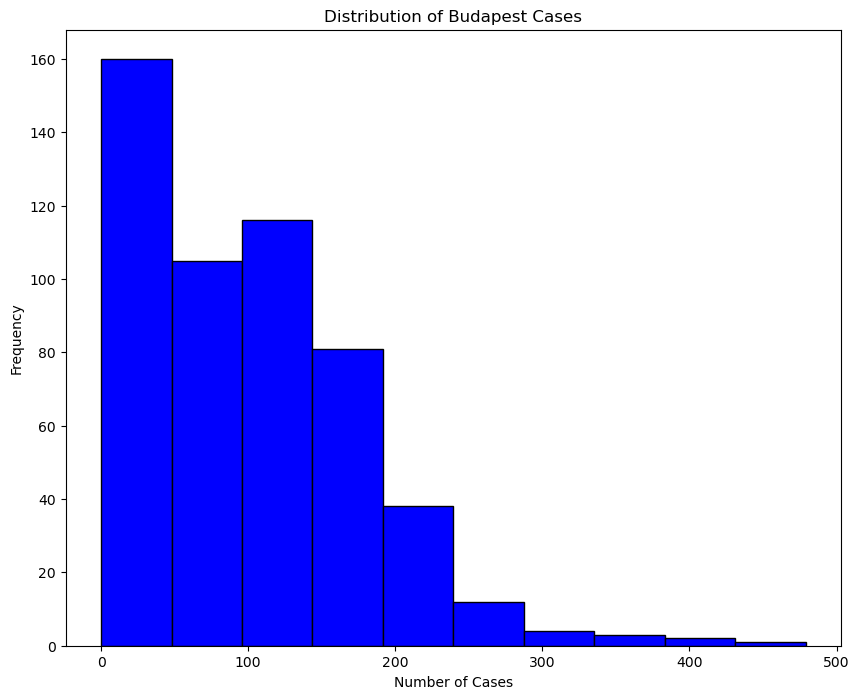

In [43]:
plt.figure(figsize=(10, 8))
plt.hist(pox['budapest_cases'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Budapest Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.show()

# Offset Aliases in Time Series

- **B**: Business day frequency
- **C**: Custom business day frequency
- **D**: Calendar day frequency
- **W**: Weekly frequency
- **ME**: Month end frequency
- **SME**: Semi-month end frequency (15th and end of month)
- **BME**: Business month end frequency
- **CBME**: Custom business month end frequency
- **MS**: Month start frequency
- **SMS**: Semi-month start frequency (1st and 15th)
- **BMS**: Business month start frequency
- **CBMS**: Custom business month start frequency
- **QE**: Quarter end frequency
- **BQE**: Business quarter end frequency
- **QS**: Quarter start frequency
- **BQS**: Business quarter start frequency
- **YE**: Year end frequency
- **BYE**: Business year end frequency
- **YS**: Year start frequency
- **BYS**: Business year start frequency
- **h**: Hourly frequency
- **bh**: Business hour frequency
- **cbh**: Custom business hour frequency
- **min**: Minutely frequency
- **s**: Secondly frequency
- **ms**: Milliseconds
- **us**: Microseconds
- **ns**: Nanoseconds

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method on the DataFrame to answer this question.

In [48]:
pox.resample('YE').sum()

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


### Visualizations

**Make a line plot of chickenpox cases**

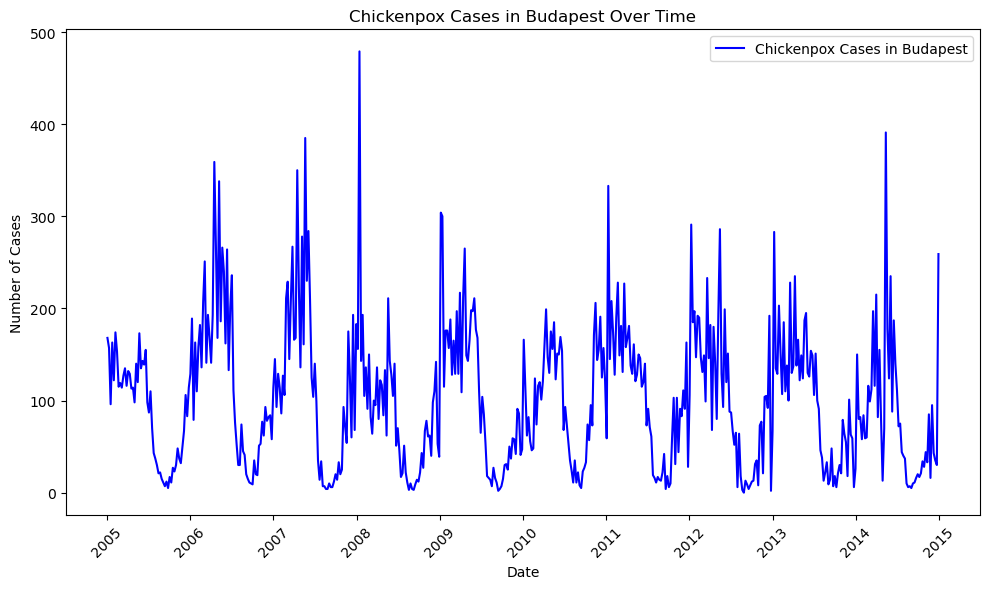

In [54]:
# Plotting the time series of chickenpox cases in Budapest
plt.figure(figsize=(10, 6))
plt.plot(pox.index, pox['budapest_cases'], label='Chickenpox Cases in Budapest', color='blue')
plt.title('Chickenpox Cases in Budapest Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**In short answer format, describe any apparent trends**

In [ ]:
# The number of cases seems to spike at certain times of the year, likely reflecting seasonal trends in chickenpox outbreaks.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

In [ ]:
case = pox['budapest_cases'] 

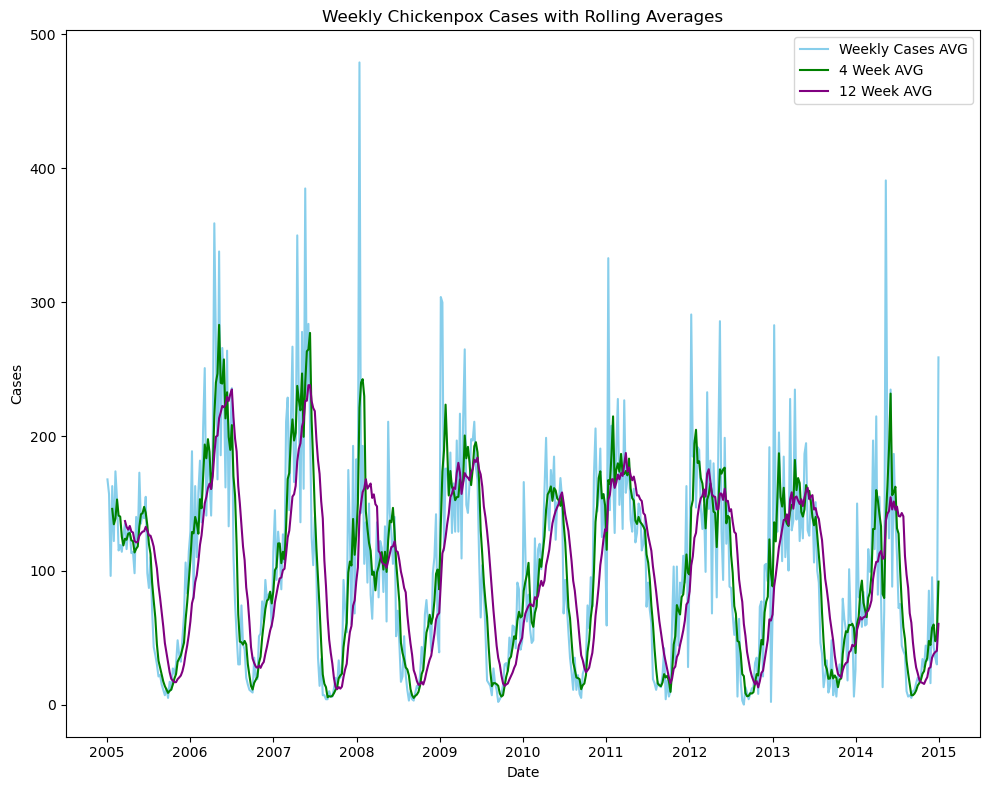

In [70]:
# plot weekly cases and rolling averages
plt.figure(figsize=(10,8))
plt.plot(case.rolling(1).mean(), color='skyblue', label='Weekly Cases AVG')
plt.plot(case.rolling(4).mean(), color='green', label='4 Week AVG')
plt.plot(case.rolling(12).mean(), color='purple', label='12 Week AVG')

# Adding labels and title
plt.title('Weekly Chickenpox Cases with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Cases')

plt.legend()
plt.tight_layout()
plt.show()

### Plot yearly chickenpox cases

You may need to use [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) again for this.

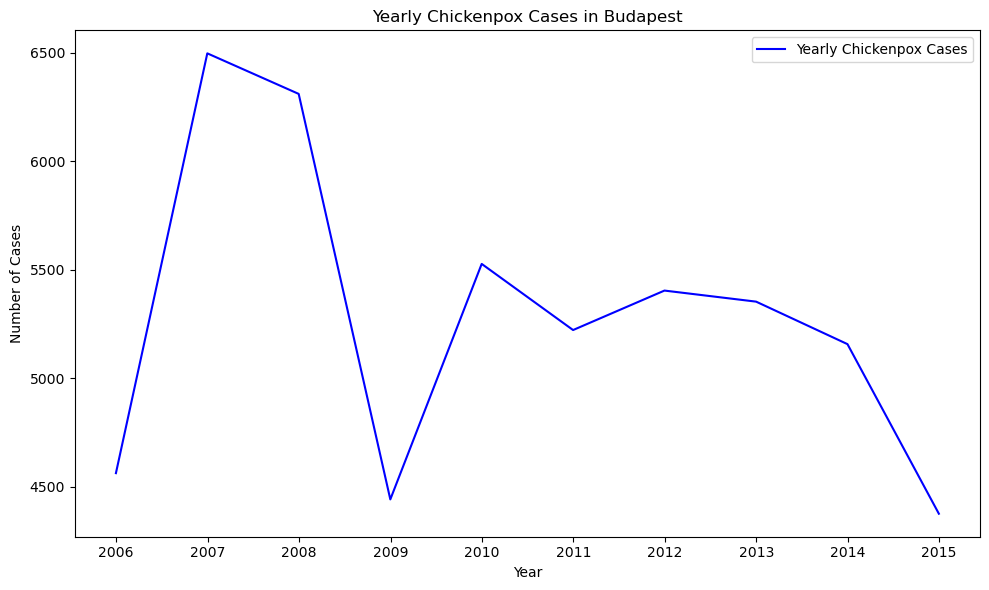

In [74]:
# Resample the data by year and sum the cases
yearly_pox = pox.resample('YE').sum()

# Plotting the yearly chickenpox cases
plt.figure(figsize=(10, 6))
plt.plot(yearly_pox.index, yearly_pox['budapest_cases'], label='Yearly Chickenpox Cases', color='blue')

# Adding title and labels
plt.title('Yearly Chickenpox Cases in Budapest')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()

plt.tight_layout()
plt.show()